In [49]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

### Calculation of the disparity map

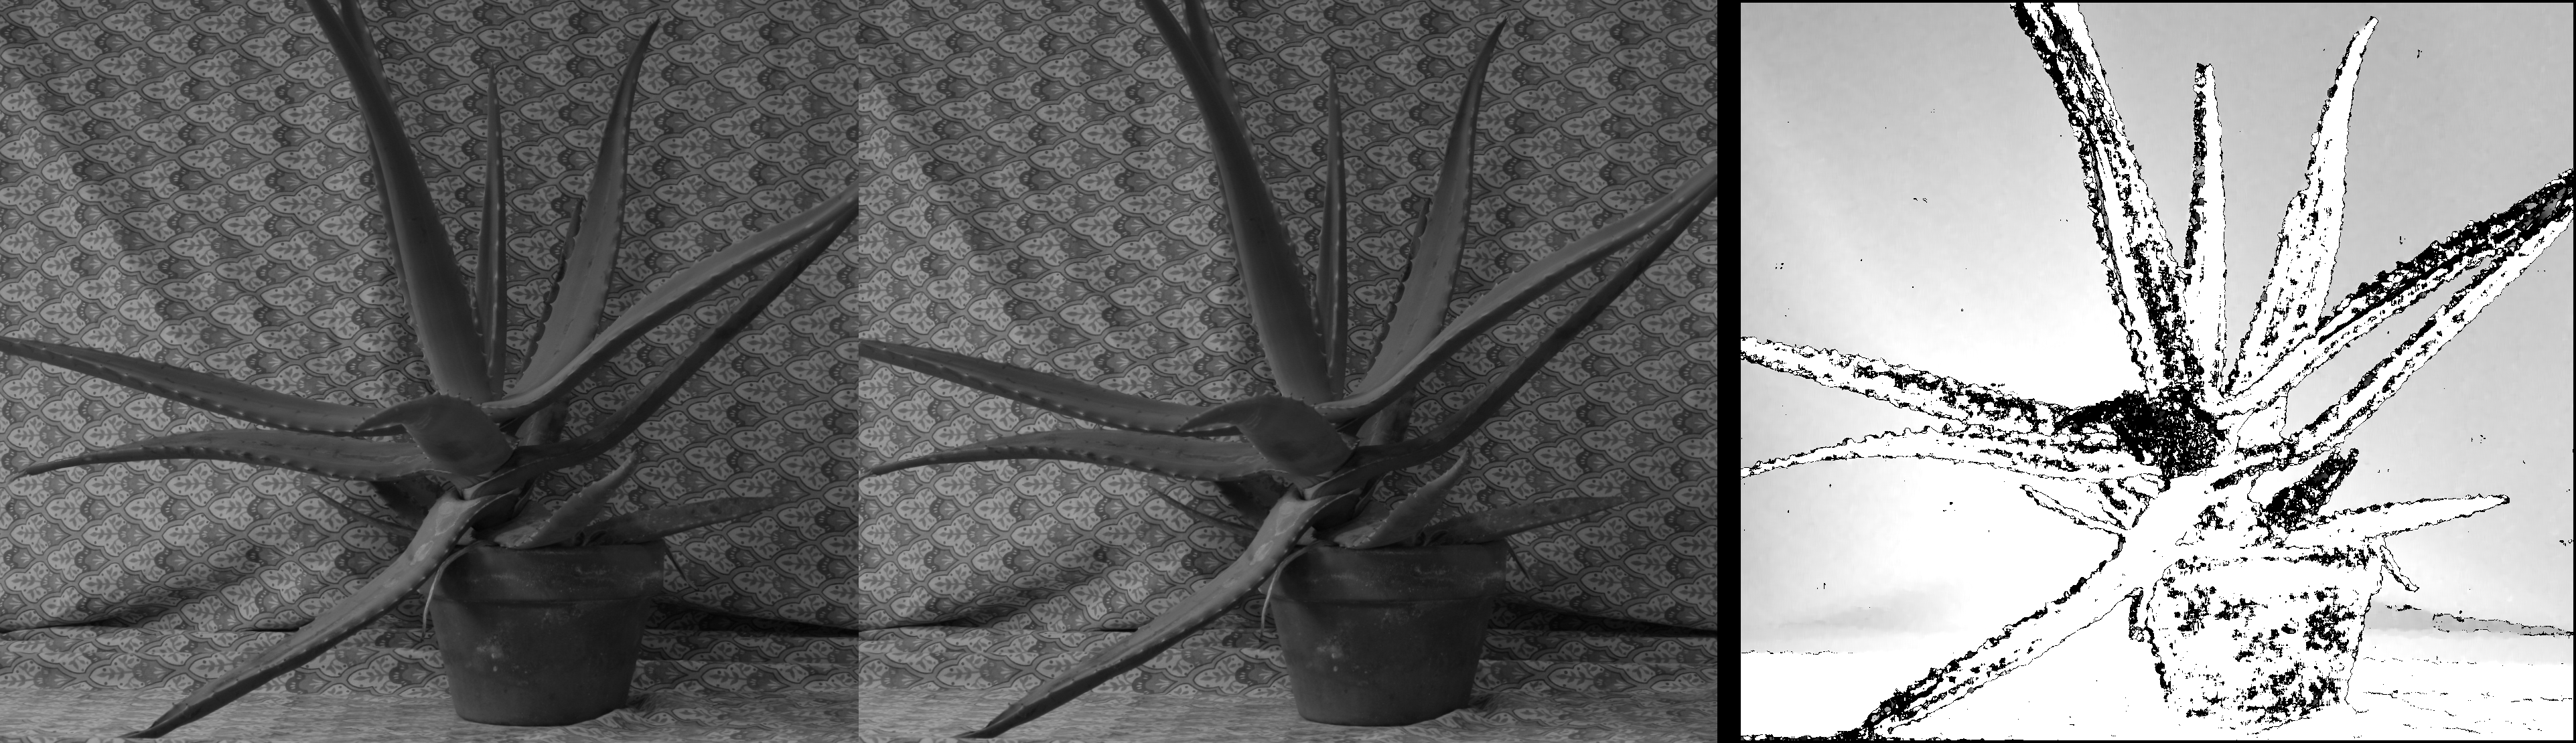

In [50]:
path = ""

def to_desparity(imgL, imgR, numDisparities, blockSize):
  stereo = cv2.StereoBM_create(numDisparities=numDisparities, blockSize=blockSize)
  return stereo.compute(imgL,imgR)

imgL = cv2.imread(path+'view4.png', 0)
imgR = cv2.imread(path+'view5.png', 0)
desparity = to_desparity(imgL, imgR, 32, 9)
cv2_imshow(np.hstack([imgL, imgR, desparity]))

### Filtering the depth map


Kernel size for average and for Gaussian filters = (11, 11), noise for median filter = 3
1. Original, 2. Average filter, 3. Gaussian filter, 4. Median filter


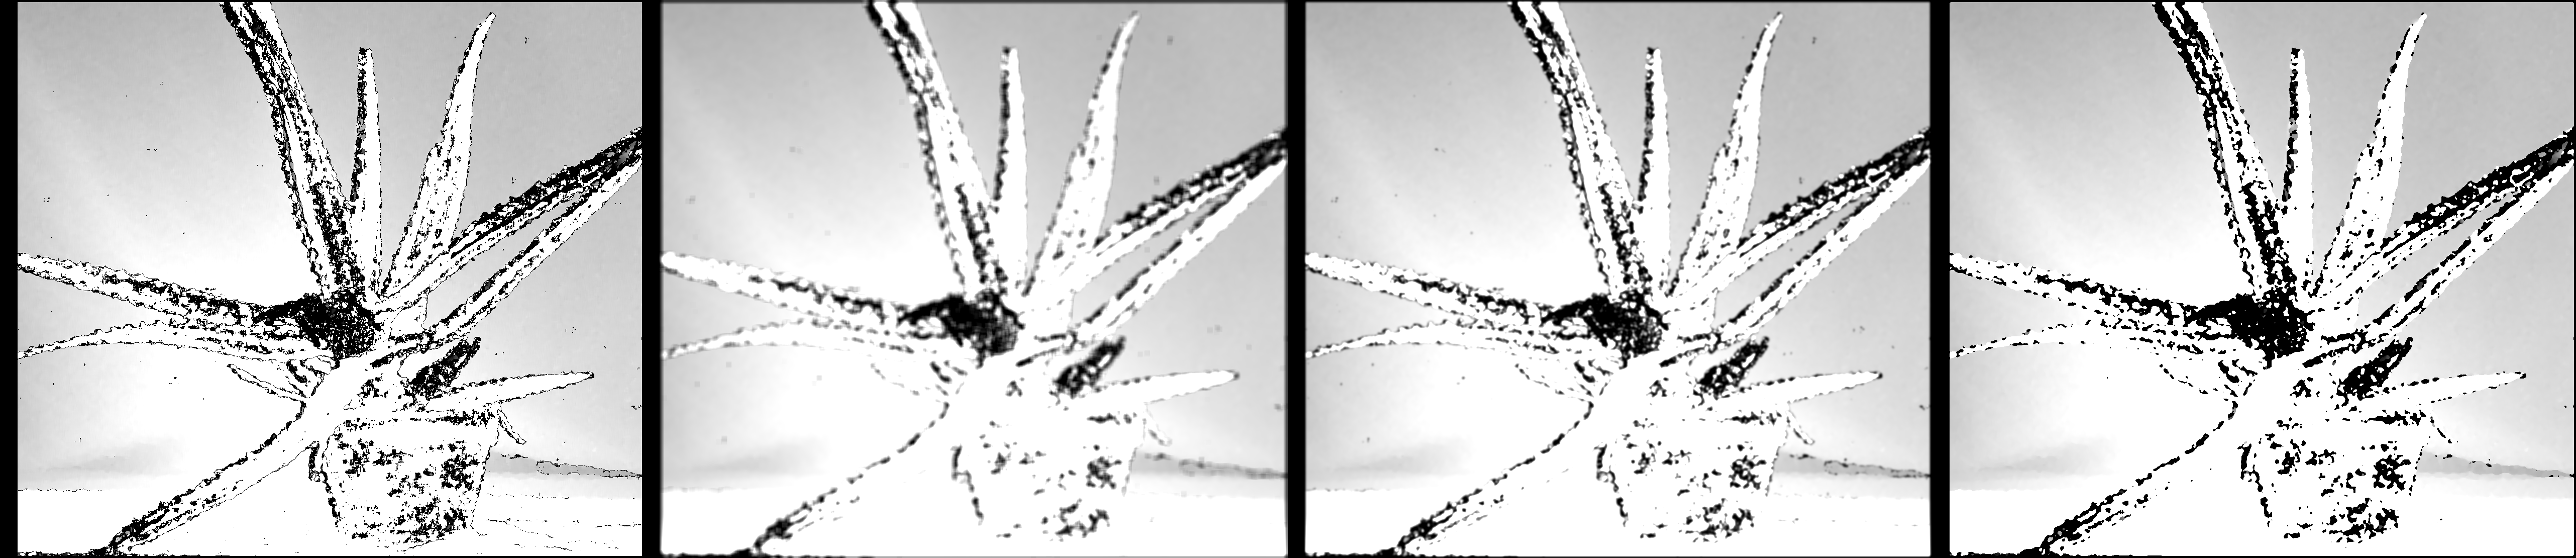


Kernel size for average and for Gaussian filters = (21, 21), noise for median filter = 5
1. Original, 2. Average filter, 3. Gaussian filter, 4. Median filter


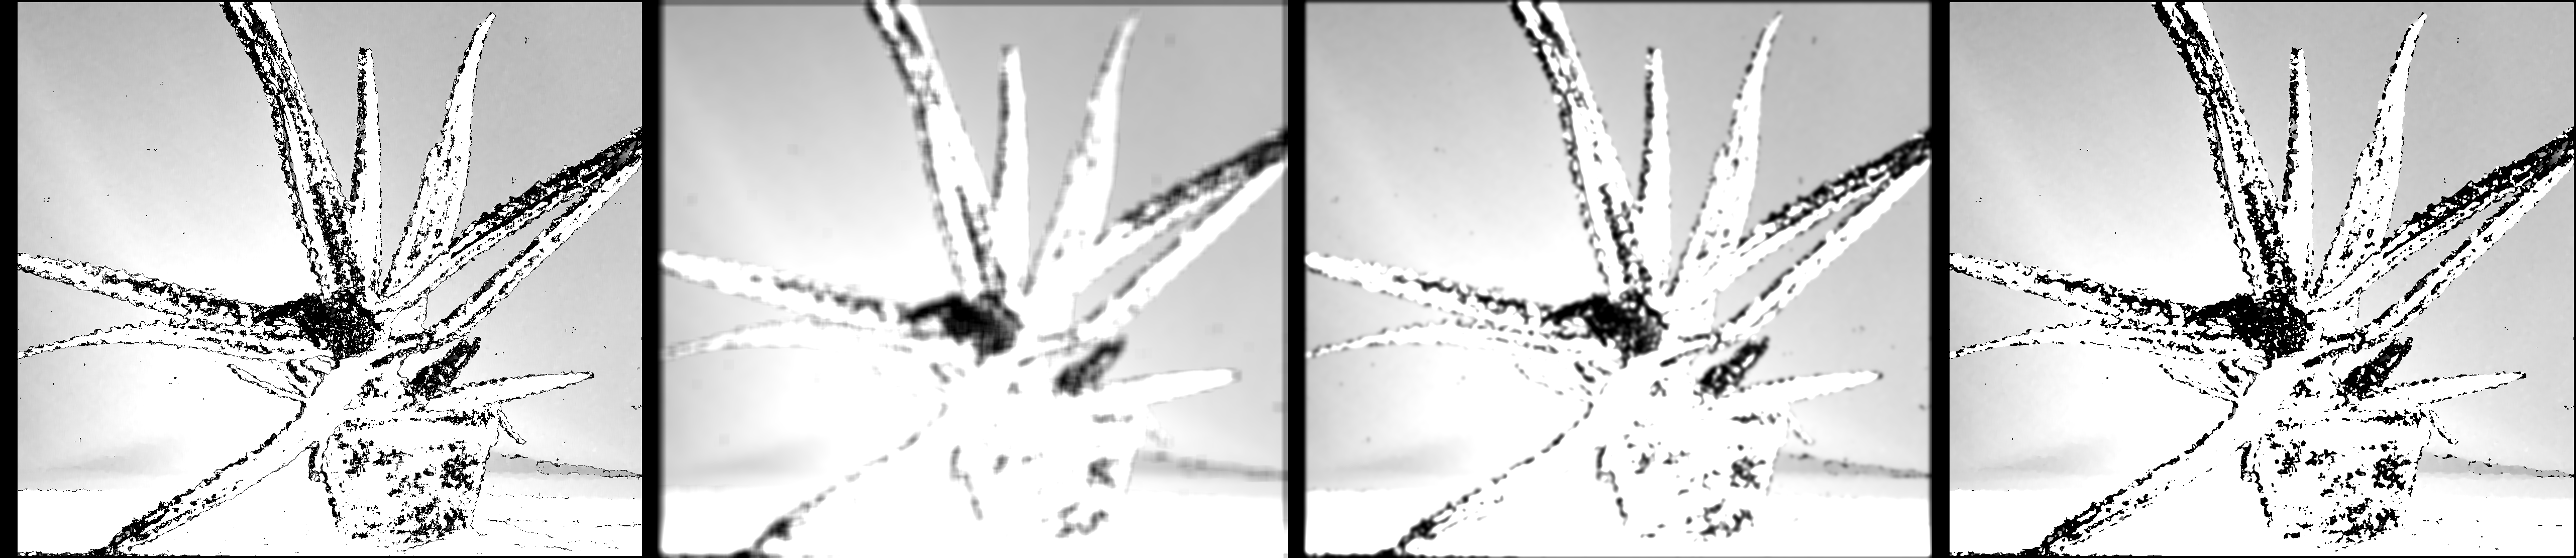

In [51]:
def filtering(desparity, kernel_size, noise):
  blur = cv2.blur(desparity, kernel_size)
  blurG = cv2.GaussianBlur(desparity, kernel_size, 0)
  median = cv2.medianBlur(desparity, ksize=noise)
  return blur, blurG, median

print("\nKernel size for average and for Gaussian filters = (11, 11), noise for median filter = 3")
print("1. Original, 2. Average filter, 3. Gaussian filter, 4. Median filter")
blur, blurG, median = filtering(desparity, (11, 11), 5)
cv2_imshow(np.hstack([desparity, blur, blurG, median]))

print("\nKernel size for average and for Gaussian filters = (21, 21), noise for median filter = 5")
print("1. Original, 2. Average filter, 3. Gaussian filter, 4. Median filter")
blur, blurG, median = filtering(desparity, (21, 21), 3)
cv2_imshow(np.hstack([desparity, blur, blurG, median]))

### Loading a depth map from a set of

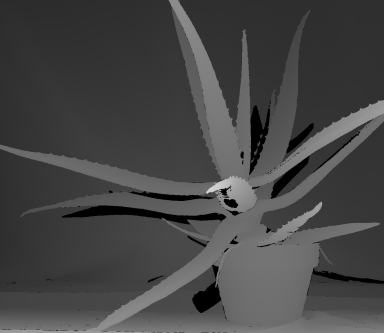

In [52]:
def resize(img, scale_percent):
  width = int(img.shape[1] * scale_percent)
  height = int(img.shape[0] * scale_percent)
  dim = (width, height)
  return cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

depth_img = cv2.imread(path+'depth_view45.png', 0)
cv2_imshow(resize(depth_img, 0.3))

### Comparison of filters using the MSE method

In [53]:
print("\nKernel size for average and for Gaussian filters = (11, 11), noise for median filter = 3")
blur, blurG, median = filtering(desparity, (11, 11), 5)
for filter, filtr_name in zip([desparity, blur, blurG, median], ["No filter", "Average", "Gaissian", "Median"]):
  diff = np.subtract(depth_img, filter)
  print(f"{filtr_name}: {np.abs(np.round((diff * diff).mean(), 3))}")

print("\nKernel size for average and for Gaussian filters = (21, 21), noise for median filter = 5")
blur, blurG, median = filtering(desparity, (21, 21), 3)
for filter, filtr_name in zip([desparity, blur, blurG, median], ["No filter", "Average", "Gaissian", "Median"]):
  diff = np.subtract(depth_img, filter)
  print(f"{filtr_name}: {np.abs(np.round((diff * diff).mean(), 3))}")


Kernel size for average and for Gaussian filters = (11, 11), noise for median filter = 3
No filter: 8394.101
Average: 8011.843
Gaissian: 8073.181
Median: 8363.969

Kernel size for average and for Gaussian filters = (21, 21), noise for median filter = 5
No filter: 8394.101
Average: 7887.783
Gaissian: 7983.361
Median: 8388.119


### Testing the creation of a desparity map on other images

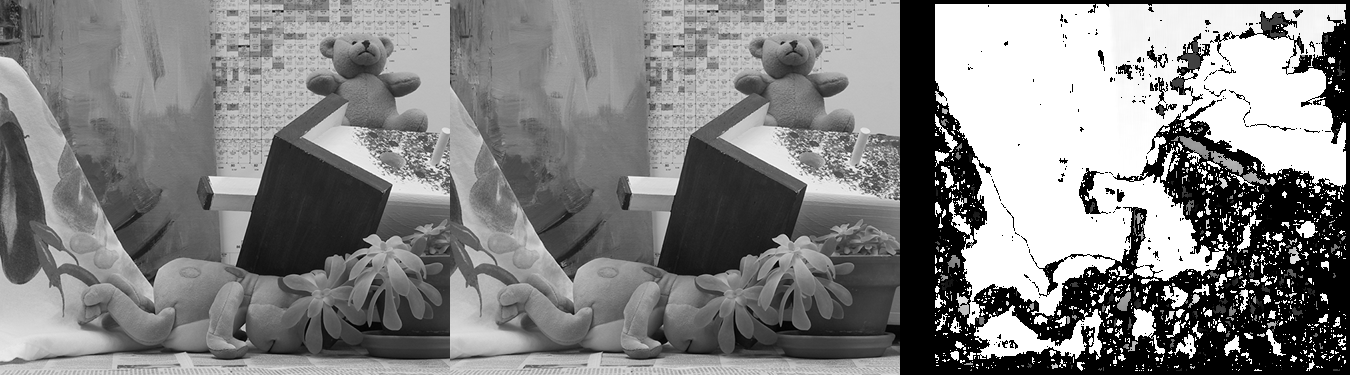


Kernel size for average and for Gaussian filters = (11, 11), noise for median filter = 3
1. Original, 2. Average filter, 3. Gaussian filter, 4. Median filter


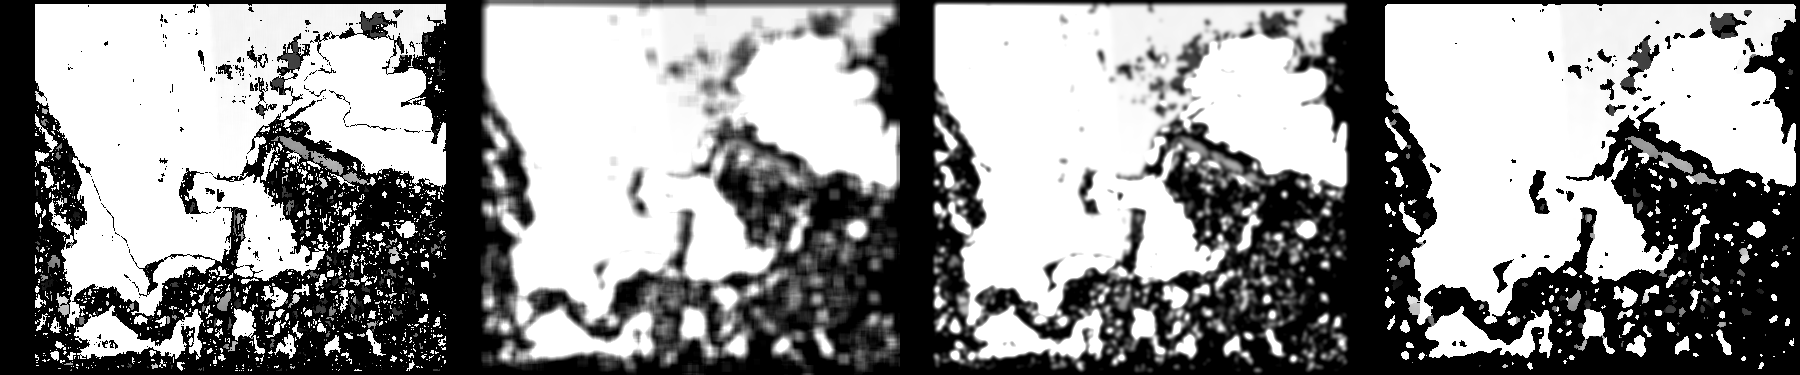


Kernel size for average and for Gaussian filters = (21, 21), noise for median filter = 5
1. Original, 2. Average filter, 3. Gaussian filter, 4. Median filter


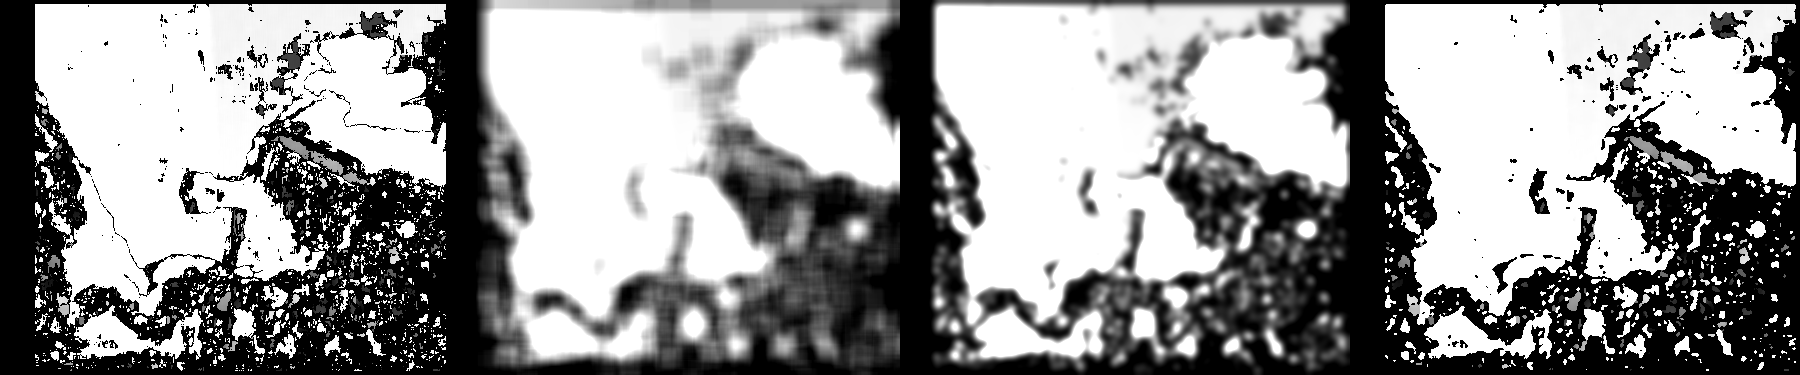

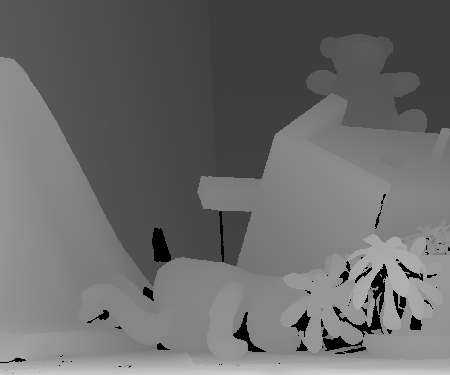


Kernel size for average and for Gaussian filters = (11, 11), noise for median filter = 3
No filter: 2032.592
Average: 2074.116
Gaissian: 2039.671
Median: 2116.245

Kernel size for average and for Gaussian filters = (21, 21), noise for median filter = 5
No filter: 2032.592
Average: 2679.311
Gaissian: 2188.234
Median: 2079.724


In [54]:
imgL = cv2.imread(path+'im2.png', 0)
imgR = cv2.imread(path+'im6.png', 0)
desparity = to_desparity(imgL, imgR, 32, 9)
cv2_imshow(np.hstack([imgL, imgR, desparity]))

print("\nKernel size for average and for Gaussian filters = (11, 11), noise for median filter = 3")
print("1. Original, 2. Average filter, 3. Gaussian filter, 4. Median filter")
blur, blurG, median = filtering(desparity, (11, 11), 5)
cv2_imshow(np.hstack([desparity, blur, blurG, median]))

print("\nKernel size for average and for Gaussian filters = (21, 21), noise for median filter = 5")
print("1. Original, 2. Average filter, 3. Gaussian filter, 4. Median filter")
blur, blurG, median = filtering(desparity, (21, 21), 3)
cv2_imshow(np.hstack([desparity, blur, blurG, median]))

depth_img = cv2.imread(path+'depth_view26.png', 0)
cv2_imshow(resize(depth_img, 1))

print("\nKernel size for average and for Gaussian filters = (11, 11), noise for median filter = 3")
blur, blurG, median = filtering(desparity, (11, 11), 5)
for filter, filtr_name in zip([desparity, blur, blurG, median], ["No filter", "Average", "Gaissian", "Median"]):
  diff = np.subtract(depth_img, filter)
  print(f"{filtr_name}: {np.abs(np.round((diff * diff).mean(), 3))}")

print("\nKernel size for average and for Gaussian filters = (21, 21), noise for median filter = 5")
blur, blurG, median = filtering(desparity, (21, 21), 3)
for filter, filtr_name in zip([desparity, blur, blurG, median], ["No filter", "Average", "Gaissian", "Median"]):
  diff = np.subtract(depth_img, filter)
  print(f"{filtr_name}: {np.abs(np.round((diff * diff).mean(), 3))}")

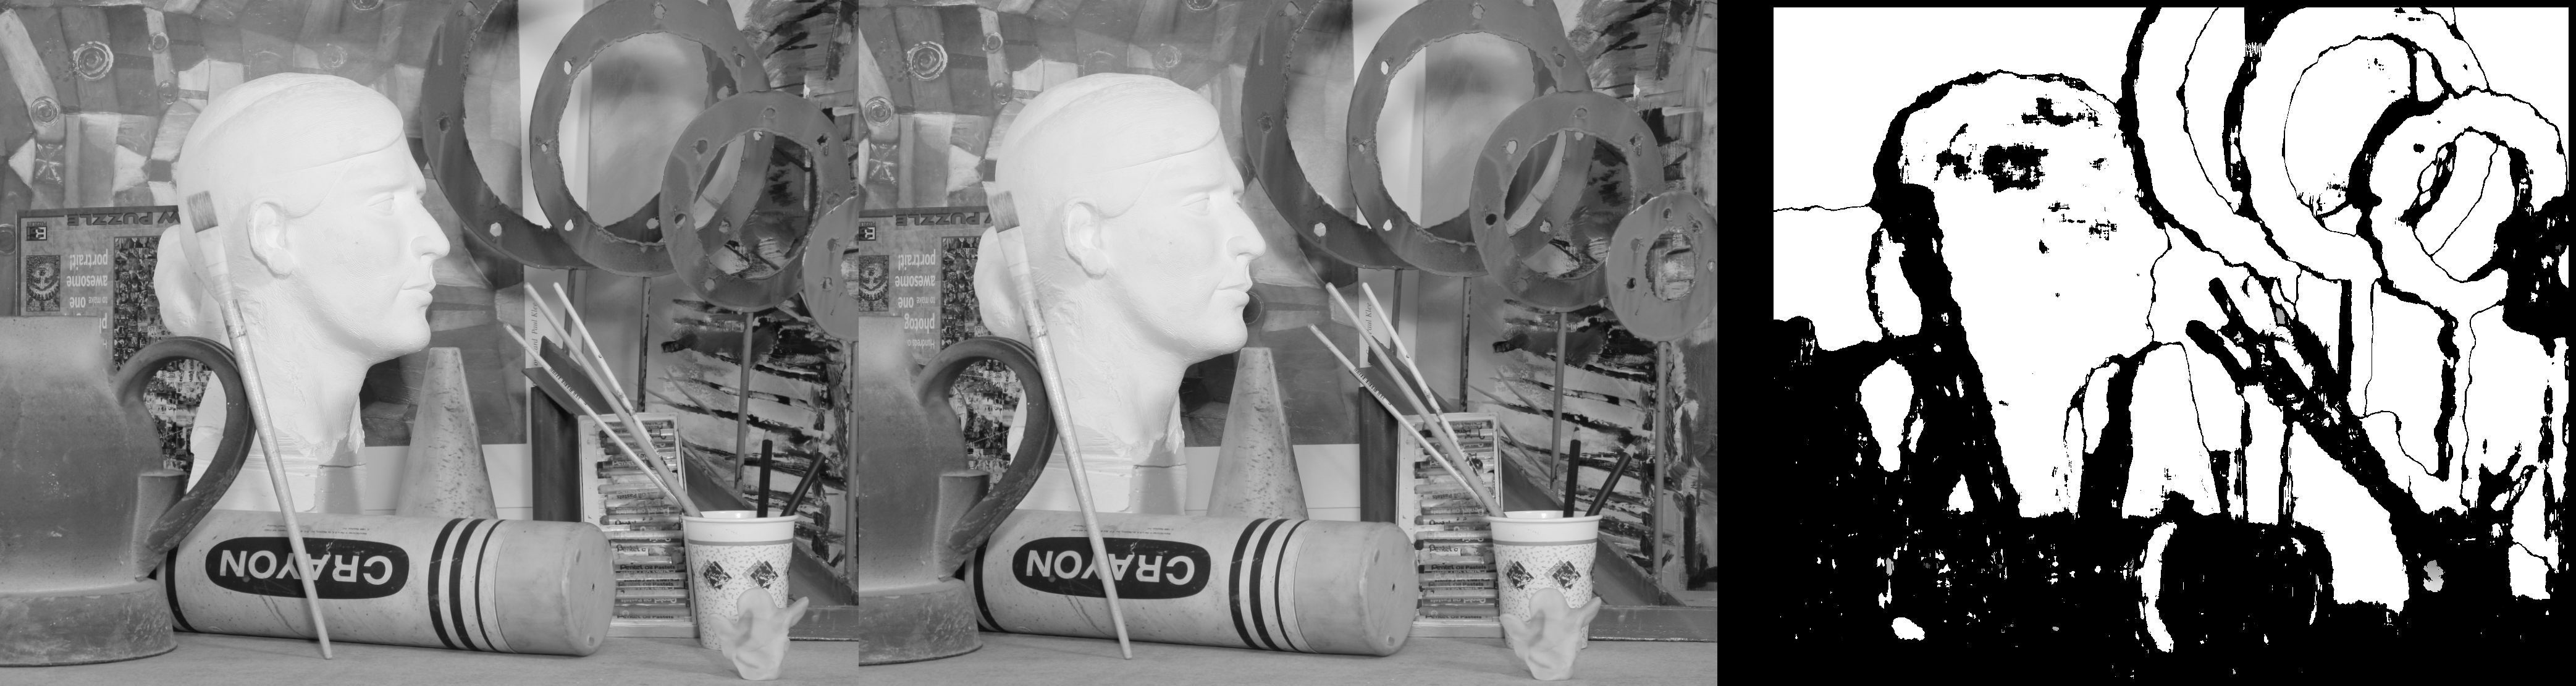


Kernel size for average and for Gaussian filters = (11, 11), noise for median filter = 3
1. Original, 2. Average filter, 3. Gaussian filter, 4. Median filter


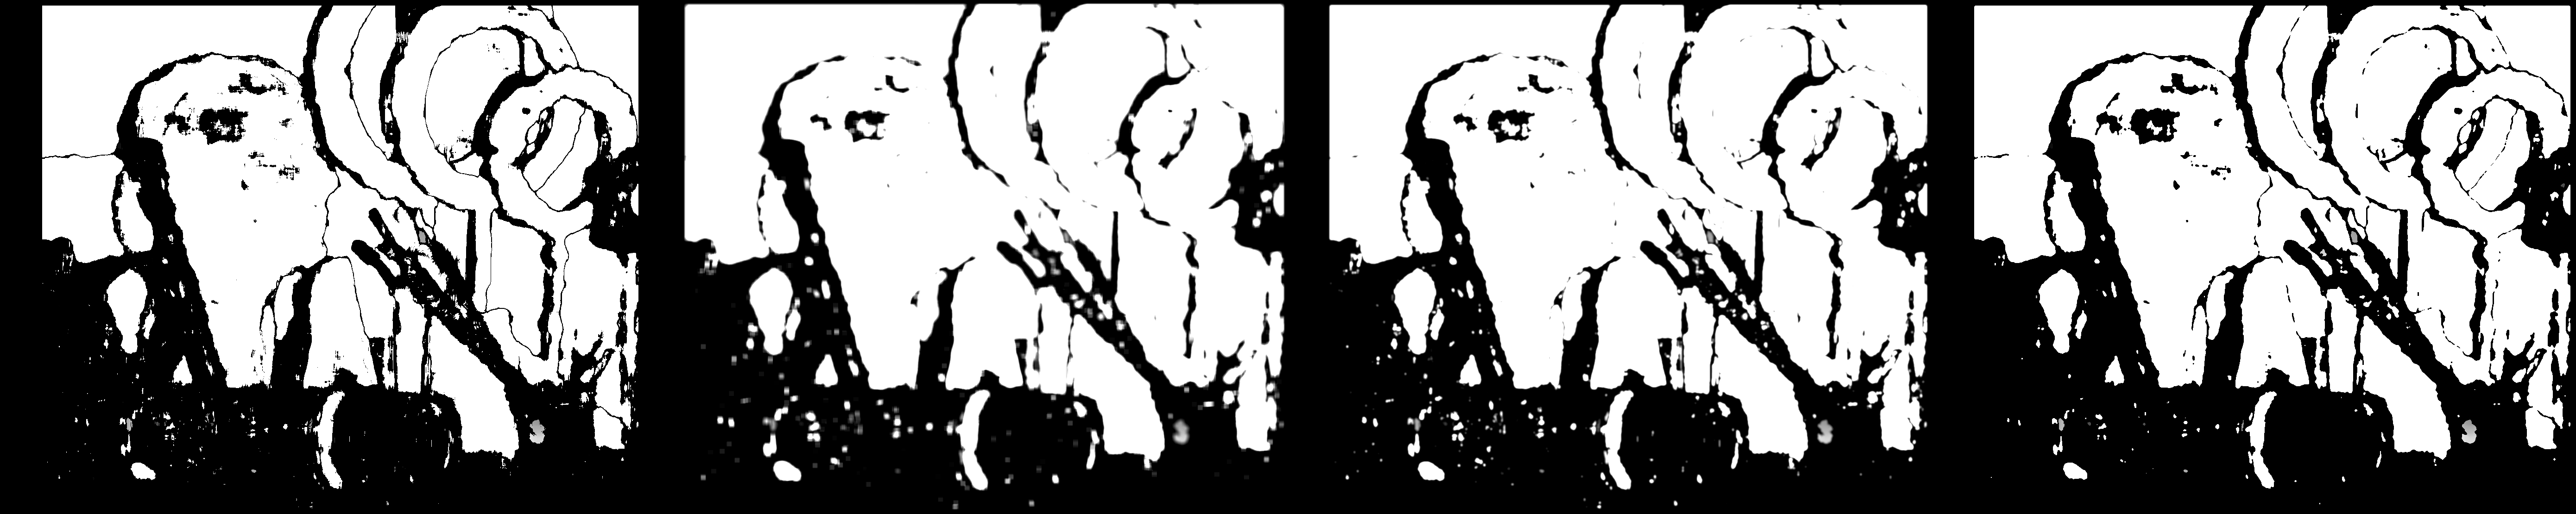


Kernel size for average and for Gaussian filters = (21, 21), noise for median filter = 5
1. Original, 2. Average filter, 3. Gaussian filter, 4. Median filter


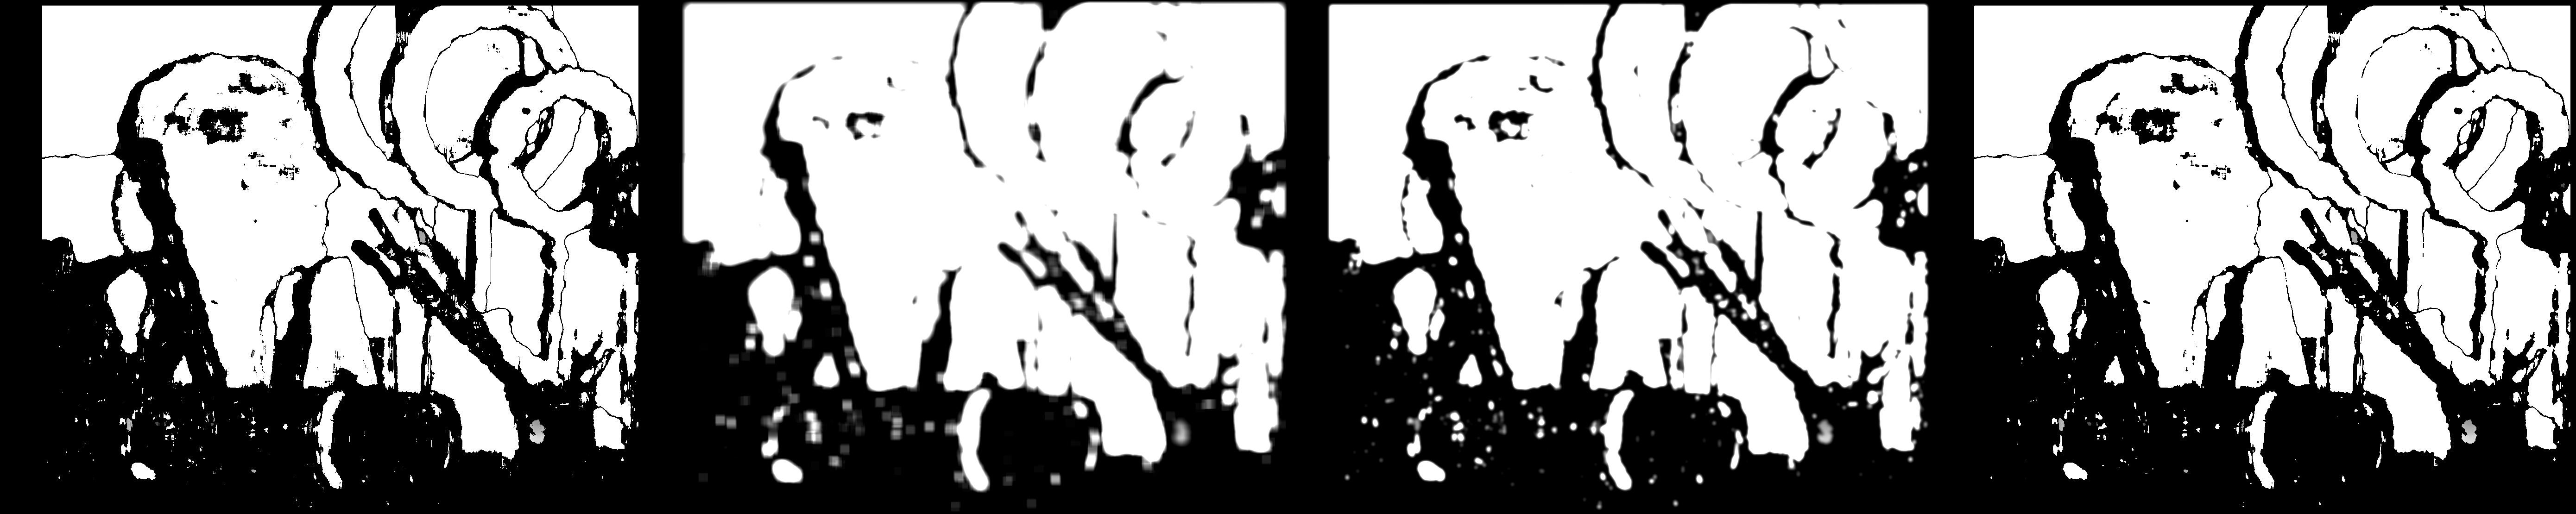

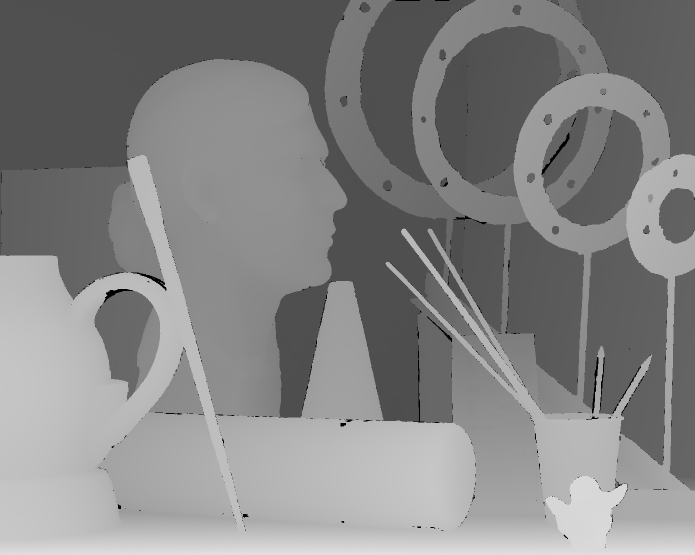


Kernel size for average and for Gaussian filters = (11, 11), noise for median filter = 3
No filter: 4818.713
Average: 4541.59
Gaissian: 4693.827
Median: 4868.936

Kernel size for average and for Gaussian filters = (21, 21), noise for median filter = 5
No filter: 4818.713
Average: 3963.757
Gaissian: 4349.58
Median: 4841.91


In [55]:
imgL = cv2.imread(path+'view0.png', 0)
imgR = cv2.imread(path+'view2.png', 0)
desparity = to_desparity(imgL, imgR, 80, 25)
cv2_imshow(np.hstack([imgL, imgR, desparity]))

print("\nKernel size for average and for Gaussian filters = (11, 11), noise for median filter = 3")
print("1. Original, 2. Average filter, 3. Gaussian filter, 4. Median filter")
blur, blurG, median = filtering(desparity, (11, 11), 5)
cv2_imshow(np.hstack([desparity, blur, blurG, median]))

print("\nKernel size for average and for Gaussian filters = (21, 21), noise for median filter = 5")
print("1. Original, 2. Average filter, 3. Gaussian filter, 4. Median filter")
blur, blurG, median = filtering(desparity, (21, 21), 3)
cv2_imshow(np.hstack([desparity, blur, blurG, median]))

depth_img = cv2.imread(path+'depth02.png', 0)
cv2_imshow(resize(depth_img, 0.5))

print("\nKernel size for average and for Gaussian filters = (11, 11), noise for median filter = 3")
blur, blurG, median = filtering(desparity, (11, 11), 5)
for filter, filtr_name in zip([desparity, blur, blurG, median], ["No filter", "Average", "Gaissian", "Median"]):
  diff = np.subtract(depth_img, filter)
  print(f"{filtr_name}: {np.abs(np.round((diff * diff).mean(), 3))}")

print("\nKernel size for average and for Gaussian filters = (21, 21), noise for median filter = 5")
blur, blurG, median = filtering(desparity, (21, 21), 3)
for filter, filtr_name in zip([desparity, blur, blurG, median], ["No filter", "Average", "Gaissian", "Median"]):
  diff = np.subtract(depth_img, filter)
  print(f"{filtr_name}: {np.abs(np.round((diff * diff).mean(), 3))}")

### Conclusions:
- When creating a desparity map, the larger the block size, the smoother the shapes can be obtained (less visible noise), but then the accuracy disappears.
- With more objects in the scene, the desparity map is produced much worse (not very clear, the shape of individual objects fades)
- Evaluation of the quality of the MSE map indicated that the Average filter, which dewdrops the map the most, performed best. Visually, it can be said that the Gaussian filter works much better, there is less noise and jagged edges, but the map is still clear.